In [11]:
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.decomposition import PCA
plt.rcParams['font.sans-serif']=['SimHei'] #图中文字体设置为黑体
plt.rcParams['axes.unicode_minus']=False
from tqdm.notebook import tqdm
from sklearn.metrics import silhouette_score
import scipy
import numpy as np
import random
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import math
from scipy.stats import entropy
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree

In [2]:
def read_data(file_name):
    df = pd.read_csv(file_name)
    #df = df.drop(labels=['BASIC_entity_name', 'BASIC_year'], axis=1)
    fields_df = pd.read_excel('IDOU_05_事件触发_03_大小类事件映射表_v2.0.xlsx')
    rename_dict = {}
    for i, row in fields_df.iterrows():
        rename_dict[row['大类事件代码'] + '_' + row['小类事件代码']] = row['名称']
    df = df.rename(columns=rename_dict)
    if 'REVENUEAB_test' in df.columns:
        df = df.drop(labels='REVENUEAB_test', axis=1)
    return df

In [3]:
df_all = read_data('舞弊案例全市场数据2014-2021.csv')
df_part_1 = read_data('all_samples.csv')
df_part_2 = read_data('舞弊案例数据库.csv')

In [4]:
df_part = df_part_1

In [5]:
def drop_fraud_samples(df_all, df_part):
    for _, row in df_part.iterrows():
        name, year = row['BASIC_entity_name'], row['BASIC_year']
        tmp = df_all[(df_all['BASIC_entity_name'] == name) & (df_all['BASIC_year'] == year)]
        if len(tmp) > 0:
            df_all = df_all.drop(tmp.index, axis=0)
    df_all = df_all.reset_index(drop=True)
    df_all = df_all.drop(labels=['BASIC_entity_name', 'BASIC_year'], axis=1)
    df_part = df_part.drop(labels=['BASIC_entity_name', 'BASIC_year'], axis=1)
    feats = df_all.columns
    df_all['label'] = 0
    df_part['label'] = 1
    df_part = df_part[df_part.columns]
    df_all = pd.concat([df_all, df_part], axis=0)
    return df_all[feats], df_all['label']

In [6]:
X, y = drop_fraud_samples(df_all, df_part)

In [12]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

DecisionTreeClassifier(random_state=0)

[Text(0.536008577766474, 0.9883720930232558, '关联投资异常-子公司资金支持 <= 0.5\ngini = 0.362\nsamples = 44460\nvalue = [33924, 10536]\nclass = 0'),
 Text(0.3197205624260324, 0.9651162790697675, '收入增长异常-现金流与营收背离 <= 0.5\ngini = 0.209\nsamples = 28957\nvalue = [25527, 3430]\nclass = 0'),
 Text(0.21544270808144655, 0.9418604651162791, '筹资活动异常-高息融资 <= 0.5\ngini = 0.125\nsamples = 22707\nvalue = [21183, 1524]\nclass = 0'),
 Text(0.1388617487776302, 0.9186046511627907, '成本费用异常-可操纵应计费用调节 <= 0.5\ngini = 0.095\nsamples = 20677\nvalue = [19639, 1038]\nclass = 0'),
 Text(0.09744399681185999, 0.8953488372093024, '资产质量异常-商誉质量存疑 <= 0.5\ngini = 0.056\nsamples = 16292\nvalue = [15818, 474]\nclass = 0'),
 Text(0.08225765849520439, 0.872093023255814, '财务困境-净利润连续两年为负 <= 0.5\ngini = 0.048\nsamples = 15671\nvalue = [15284, 387]\nclass = 0'),
 Text(0.06420939959271654, 0.8488372093023255, '成本费用异常-会计政策调节 <= 0.5\ngini = 0.046\nsamples = 15590\nvalue = [15225, 365]\nclass = 0'),
 Text(0.04906761919607684, 0.82558139534883

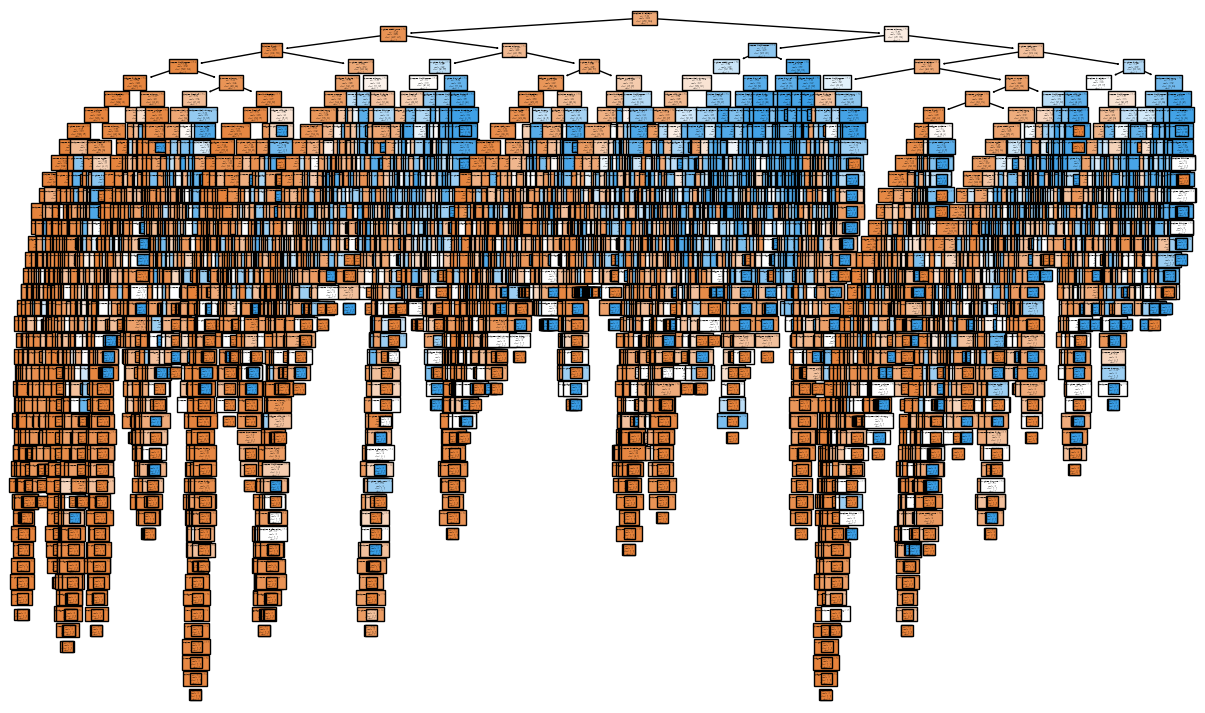

In [17]:
plt.figure(figsize=(15,9))
tree.plot_tree(clf,filled=True,feature_names=X.columns, class_names=['0','1'])